Import Library

In [ ]:
!pip install category_encoders
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from statsmodels.formula.api import ols
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 2.3 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('application_train.csv')

Y = df['TARGET']
X = df.drop(columns=['TARGET'])

X.head(10)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,157876,Cash loans,F,N,Y,0,67500.0,343800.0,16155.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,157878,Cash loans,M,Y,N,2,247500.0,945000.0,40167.0,945000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
2,157879,Revolving loans,M,N,Y,2,180000.0,540000.0,27000.0,540000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
3,157880,Cash loans,F,N,Y,0,112500.0,295168.5,16011.0,238500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
4,157881,Cash loans,F,N,Y,0,63000.0,298512.0,17266.5,270000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,157882,Cash loans,F,N,Y,0,67500.0,640080.0,24259.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
6,157883,Cash loans,F,N,N,0,157500.0,325908.0,17811.0,247500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
7,157884,Cash loans,M,N,Y,0,90000.0,545040.0,20677.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
8,157885,Cash loans,M,Y,N,0,112500.0,539959.5,42790.5,441000.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0
9,157887,Cash loans,F,N,Y,0,148500.0,1024740.0,52452.0,900000.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,3.0


#EDA

## Ukuran dataset

In [ ]:
print("Ukuran dataset:", df.shape)

Ukuran dataset: (91082, 122)


#Info tipe data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91082 entries, 0 to 91081
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(62), int64(44), object(16)
memory usage: 84.8+ MB


##Statistik numerik

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,91082.0,210818.580213,30505.324163,157876.0,184387.25,210923.5,237191.75,263570.0
TARGET,91082.0,0.082080,0.274488,0.0,0.00,0.0,0.00,1.0
CNT_CHILDREN,91082.0,0.417163,0.719215,0.0,0.00,0.0,1.00,12.0
AMT_INCOME_TOTAL,91082.0,168069.497088,105943.412243,26460.0,112500.00,144000.0,202500.00,9000000.0
AMT_CREDIT,91082.0,599093.986759,402881.395401,45000.0,270000.00,513000.0,808650.00,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,78865.0,0.006644,0.112635,0.0,0.00,0.0,0.00,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,78865.0,0.034426,0.208535,0.0,0.00,0.0,0.00,8.0
AMT_REQ_CREDIT_BUREAU_MON,78865.0,0.266164,0.920368,0.0,0.00,0.0,0.00,23.0
AMT_REQ_CREDIT_BUREAU_QRT,78864.0,0.265558,0.611769,0.0,0.00,0.0,0.00,8.0


##Distribusi Kelas Target

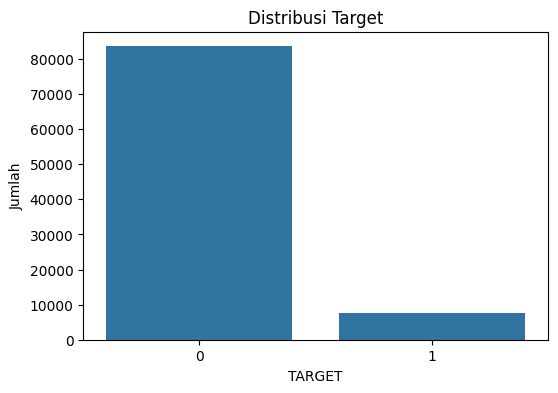

,proportion
TARGET,
0,91.792012
1,8.207988


In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=Y)
plt.title("Distribusi Target")
plt.xlabel("TARGET")
plt.ylabel("Jumlah")
plt.show()

# Persentase kelas
Y.value_counts(normalize=True) * 100

# Pre-processing

## Missing Values

In [ ]:
# Penanganan Missing Values Numerik
kolom_angka = X.select_dtypes(include=['int64', 'float64']).columns
imputer_angka = SimpleImputer(strategy='median')
X[kolom_angka] = imputer_angka.fit_transform(X[kolom_angka])
joblib.dump(imputer_angka, "imputer_angka.pkl")

# Penanganan Missing Values Kata / Kategorik
kolom_kata = X.select_dtypes(include=['object']).columns
imputer_freq = SimpleImputer(strategy='most_frequent')
X[kolom_kata] = imputer_freq.fit_transform(X[kolom_kata])
joblib.dump(imputer_freq, "imputer_kategorikal.pkl")

['imputer_kategorikal.pkl']

In [ ]:
missing_df = X.isnull().sum()
missing_df = missing_df[missing_df > 0].reset_index()
missing_df.columns = ['kolom', 'jumlah_missing']
missing_df

,kolom,jumlah_missing


## Encoding

In [ ]:
# Hubungan antara pekerjaan dengan gaji
model = ols('AMT_INCOME_TOTAL ~ C(OCCUPATION_TYPE)', data=X).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('Tabel ANOVA Pekerjaan dan Gaji:')
print(anova_table)

# Hubungan antara sektor kerja dengan gaji
model1 = ols('AMT_INCOME_TOTAL ~ C(ORGANIZATION_TYPE)', data=X).fit()
anova_table = sm.stats.anova_lm(model1, typ=2)
print('Tabel ANOVA Sektor Pekerjaan dan Gaji:')
print(anova_table)

# Hubungan antara pekerjaan dengan kredit diterima atau tidak
from scipy.stats import chi2_contingency
import pandas as pd

ct = pd.crosstab(X['OCCUPATION_TYPE'], Y)
chi2, p, dof, expected = chi2_contingency(ct)
print("Nilai p-value hubungan pekerjaan dengan gaji:", p)

# Hubungan antara sektor pekerjaan dengan kredit diterima atau tidak
ct1 = pd.crosstab(X['ORGANIZATION_TYPE'], Y)
chi21, p1, dof1, expected1 = chi2_contingency(ct1)
print("Nilai p-value hubungan sektor pekerjaan dengan gaji:", p1)

Tabel ANOVA Pekerjaan dan Gaji:
                          sum_sq       df           F  PR(>F)
C(OCCUPATION_TYPE)  7.338789e+13     17.0  414.284844     0.0
Residual            9.489059e+14  91064.0         NaN     NaN
Tabel ANOVA Sektor Pekerjaan dan Gaji:
                            sum_sq       df          F  PR(>F)
C(ORGANIZATION_TYPE)  4.183649e+13     57.0  68.140869     0.0
Residual              9.804573e+14  91024.0        NaN     NaN
Nilai p-value hubungan pekerjaan dengan gaji: 1.0115757474667916e-52
Nilai p-value hubungan sektor pekerjaan dengan gaji: 4.74752593359036e-79


In [ ]:
# Encoding untuk kolom dengan One Hot Encoding
kolom_ohe = [
    "NAME_CONTRACT_TYPE",
    "HOUSETYPE_MODE",
    "NAME_TYPE_SUITE",
    "NAME_INCOME_TYPE",
    "NAME_EDUCATION_TYPE",
    "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE",
    "WEEKDAY_APPR_PROCESS_START",
    "FONDKAPREMONT_MODE",
    "WALLSMATERIAL_MODE",
    "FLAG_OWN_CAR",
    "FLAG_OWN_REALTY",
    "EMERGENCYSTATE_MODE",
    "CODE_GENDER"
]
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
ohe_ganti = ohe.fit_transform(X[kolom_ohe])
ohe_df = pd.DataFrame(ohe_ganti,
                      columns=ohe.get_feature_names_out(kolom_ohe),
                      index=X.index)

X = pd.concat([X.drop(columns=kolom_ohe), ohe_df], axis=1)
joblib.dump(ohe, "ohe.pkl")

# Encoding untuk kolom dengan jenis kategori banyak
target_encode = TargetEncoder(cols=['OCCUPATION_TYPE', 'ORGANIZATION_TYPE'])
X[['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']] = target_encode.fit_transform(
    X[['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']],
    Y)
joblib.dump(target_encode, "target_encoder.pkl")

['target_encoder.pkl']

In [ ]:
print('hasil encoding dengan OHE:')
X.head()

hasil encoding dengan OHE:


,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,WALLSMATERIAL_MODE_Wooden,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA
0,157876.0,0.0,67500.0,343800.0,16155.0,225000.0,0.015221,-19421.0,-826.0,-293.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
1,157878.0,2.0,247500.0,945000.0,40167.0,945000.0,0.019101,-15322.0,365243.0,-7733.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,157879.0,2.0,180000.0,540000.0,27000.0,540000.0,0.006207,-11120.0,-61.0,-953.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,157880.0,0.0,112500.0,295168.5,16011.0,238500.0,0.030755,-11824.0,-4467.0,-1193.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,157881.0,0.0,63000.0,298512.0,17266.5,270000.0,0.018029,-22102.0,365243.0,-2536.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
print('hasil encoding dengan Target Encoder:')
X[['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']].head()

hasil encoding dengan Target Encoder:


,OCCUPATION_TYPE,ORGANIZATION_TYPE
0,0.066589,0.063785
1,0.082309,0.053909
2,0.095642,0.094334
3,0.082309,0.086277
4,0.082309,0.053909


# Outlier

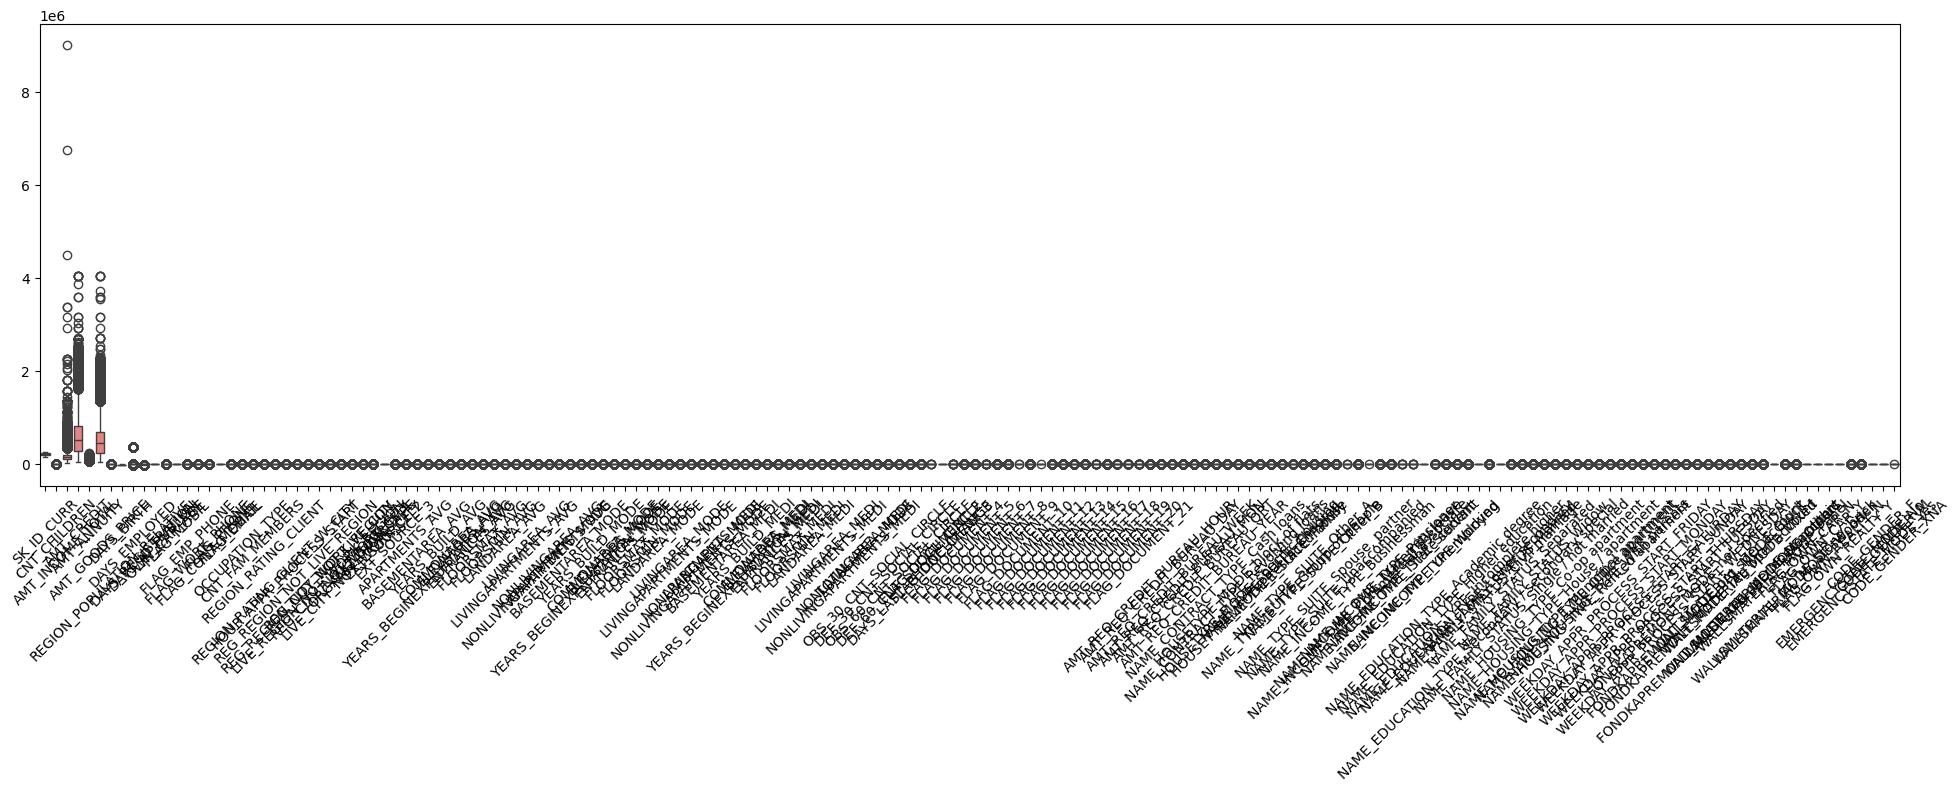

In [ ]:
# Cek data outlier dengan grafik
plt.figure(figsize=(24,6))
sns.boxplot(data=X)
plt.xticks(rotation=45)
plt.show()

Berdasarkan hasil grafik, ditemukan nilai yang sangat berbeda jauh di atas pada kolom 'AMT_INCOME_TOTAL yang merupakan kolom berisikan total gaji orang yang mengajukan kredit / pinjaman.

Kolom ini memang normal sekali untuk memiliki outlier dikarenakan jumlah gaji orang-orang pasti berbeda.

### Penanganan Outlier

Dalam menangani data yang memiliki terpencil disini kami menggunakan IQR atau  interquartile range. Lalu melakukan proses capping. Capping adalah tahapan untuk membatasi nilai-nilai terpencil itu agar tidak terpencil lagi.

In [ ]:
df_sebelum = X.copy()

Q1 = X['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = X['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

capping_params = {
    "Q1": Q1,
    "Q3": Q3,
    "IQR": IQR,
    "batas_bawah": batas_bawah,
    "batas_atas": batas_atas
}

joblib.dump(capping_params, "capping_params.pkl")

X['AMT_INCOME_TOTAL'] = np.where(
    X['AMT_INCOME_TOTAL'] > batas_atas, batas_atas,
    np.where(X['AMT_INCOME_TOTAL'] < batas_bawah, batas_bawah, X['AMT_INCOME_TOTAL'])
)

# data-data untuk kuartil
print("Sebelum Capping:")
print("Max:", df_sebelum['AMT_INCOME_TOTAL'].max())
print("\nSesudah Capping:")
print("Max:", X['AMT_INCOME_TOTAL'].max())

print("\nQ1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Batas bawah:", batas_bawah)
print("Batas atas:", batas_atas)
print("Max value:", X['AMT_INCOME_TOTAL'].max())
print("Min value:", X['AMT_INCOME_TOTAL'].min())

Sebelum Capping:
Max: 9000000.0

Sesudah Capping:
Max: 337500.0

Q1: 112500.0
Q3: 202500.0
IQR: 90000.0
Batas bawah: -22500.0
Batas atas: 337500.0
Max value: 337500.0
Min value: 26460.0


### Hasil Setelah Capping

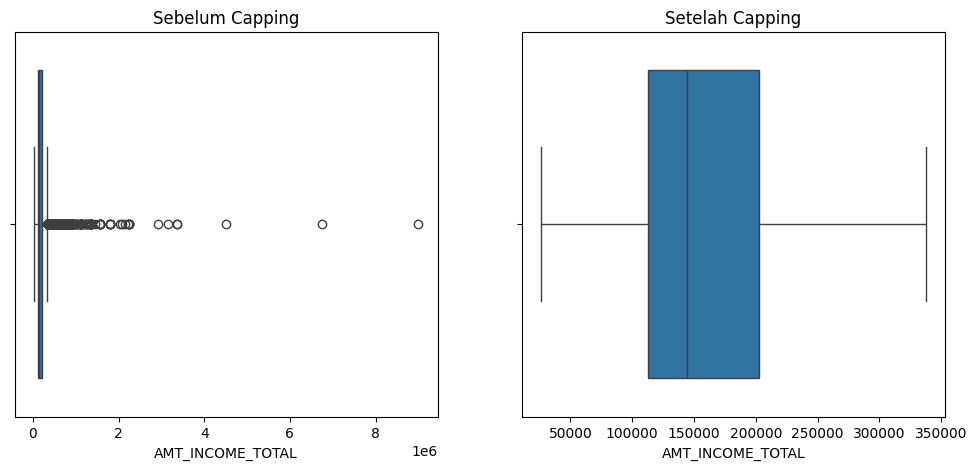

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df_sebelum['AMT_INCOME_TOTAL'])
plt.title("Sebelum Capping")

plt.subplot(1,2,2)
sns.boxplot(x=X['AMT_INCOME_TOTAL'])
plt.title("Setelah Capping")

plt.show()

## Scaling

Pada metode Scaling ini kami menggunakan Standar Scaling.

In [ ]:
# Mengambil data numerik saja
kolom_angka_scaling = X.select_dtypes(include=['float64', 'int64']).columns
joblib.dump(kolom_angka_scaling, "kolom_angka_scaling.pkl")

# Proses Scaling
scaler = StandardScaler()
X[kolom_angka_scaling] = scaler.fit_transform(X[kolom_angka_scaling])
joblib.dump(scaler, "scaler.pkl")

# Hasil Scaling
print('Hasil Scaling:')
print(X.head())
print('\nRata-rata hasil scaling:')
print(X.mean().round(2).head())
print('\nSimpangan baku hasil scaling:')
print(X.std().round(2).head())

Hasil Scaling:
   SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0   -1.735529     -0.580028         -1.293637   -0.633674    -0.752294   
1   -1.735463      2.200797          1.164554    0.858585     0.896328   
2   -1.735431      2.200797          0.242732   -0.146679    -0.007695   
3   -1.735398     -0.580028         -0.679089   -0.754384    -0.762181   
4   -1.735365     -0.580028         -1.355092   -0.746085    -0.675981   

   AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0        -0.847063                   -0.408920   -0.776492      -0.457614   
1         1.099578                   -0.128460    0.161014       2.133880   
2         0.004592                   -1.060482    1.122077      -0.452198   
3        -0.810564                    0.713930    0.961061      -0.483389   
4        -0.725398                   -0.205948   -1.389678       2.133880   

   DAYS_REGISTRATION  ...  WALLSMATERIAL_MODE_Wooden  FLAG_OWN_CAR_N  \
0    

# Split Data
untuk memastikan model dapat dievaluasi secara objektif.

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

In [ ]:
# split train–test
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)

# split train
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)


## Balance-Imbalance

## Penanganan menggunakan SMOTE

Dalam menangani imbalance, kami menggunakan SMOTE karena tidak hanya menambah jumlah data minoritas, tetapi juga menghasilkan sampel sintetis baru berdasarkan kedekatan antar data, sehingga variasi karakteristik kelompok bermasalah tetap terjaga dan model dapat belajar secara lebih optimal tanpa meningkatkan risiko overfitting.

In [ ]:
# Proses SMOTE, menerapkan hanya pada TRAIN saja
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print("Sebelum SMOTE:\n", y_train.value_counts())
print("\nSetelah SMOTE:\n", y_smote.value_counts())

Sebelum SMOTE:
 TARGET
0    53507
1     4785
Name: count, dtype: int64

Setelah SMOTE:
 TARGET
0    53507
1    53507
Name: count, dtype: int64


# Modeling

## Logistic Regression

Disini kelompok kami menggunakan solver 'lbfgs' dikarenakan dataset yang kami gunakan memiliki baris hingga 200 ribu. Solver 'lbfgs' cocok digunakan untuk data dengan baris yang banyak.

In [ ]:
log_reg_smote = LogisticRegression(
    max_iter=500,
    solver='lbfgs', #parameter terbaik
    random_state=42 #untuk memastikan hasil model konsisten
)

log_reg_smote.fit(X_smote, y_smote)

LogisticRegression(max_iter=500, random_state=42)

## Random Forest

In [ ]:
rf_smote = RandomForestClassifier(
    n_estimators=300,      #jumlah pohon, lebih besar akurasi akan lebih stabil
    max_depth=20,
    min_samples_split=20,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=-1              #seluruh core CPU, mempercepat training
)

rf_smote.fit(X_smote, y_smote)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, min_samples_split=20,
                       n_estimators=300, n_jobs=-1, random_state=42)

## ANN

In [ ]:
ann_smote = MLPClassifier(
    hidden_layer_sizes=(256, 128, 64),
    activation='relu',          #fungsi aktivasi modern, cepat dan efektif
    solver='adam',              #konvergen cepat
    learning_rate='adaptive',
    batch_size=256,
    max_iter=50,
    early_stopping=True,
    n_iter_no_change=5,
    random_state=42
)
ann_smote.fit(X_smote, y_smote)

MLPClassifier(batch_size=256, early_stopping=True,
              hidden_layer_sizes=(256, 128, 64), learning_rate='adaptive',
              max_iter=50, n_iter_no_change=5, random_state=42)

# Evaluasi

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)


In [ ]:
def evaluate_model(model, X_test, y_test, model_name):
    print(f"\nEvaluasi {model_name}")

    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    }

LR


Evaluasi LR SMOTE
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     16722
           1       0.16      0.64      0.26      1495

    accuracy                           0.69     18217
   macro avg       0.56      0.67      0.53     18217
weighted avg       0.89      0.69      0.76     18217



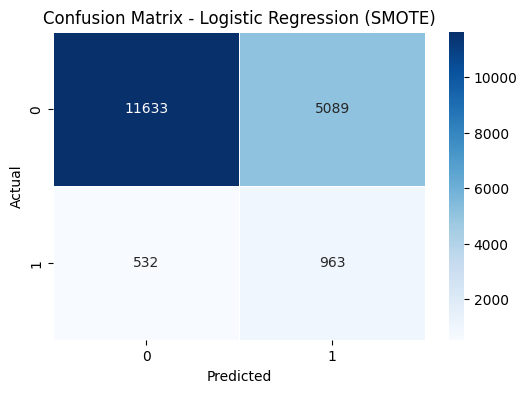

In [ ]:
eval_lr_smote = evaluate_model(log_reg_smote, X_test, y_test, "LR SMOTE")
y_pred_smote = log_reg_smote.predict(X_test)
cm = confusion_matrix(y_test, y_pred_smote)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title("Confusion Matrix - Logistic Regression (SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


RF


Evaluasi RF SMOTE
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     16722
           1       0.21      0.08      0.12      1495

    accuracy                           0.90     18217
   macro avg       0.56      0.53      0.53     18217
weighted avg       0.86      0.90      0.88     18217



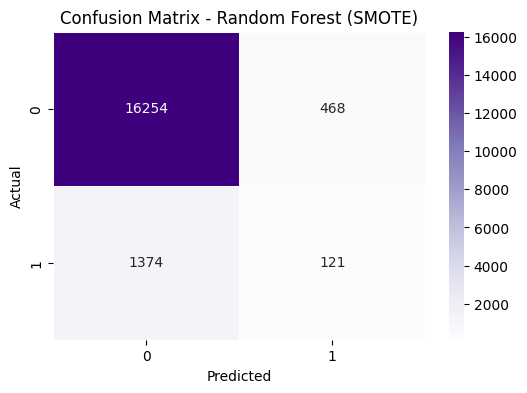

In [ ]:
eval_rf_smote = evaluate_model(rf_smote, X_test, y_test, "RF SMOTE")
y_pred_rf = rf_smote.predict(X_test)

cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', linewidths=.5)
plt.title("Confusion Matrix - Random Forest (SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ANN


Evaluasi ANN SMOTE
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     16722
           1       0.16      0.14      0.15      1495

    accuracy                           0.87     18217
   macro avg       0.54      0.54      0.54     18217
weighted avg       0.86      0.87      0.87     18217



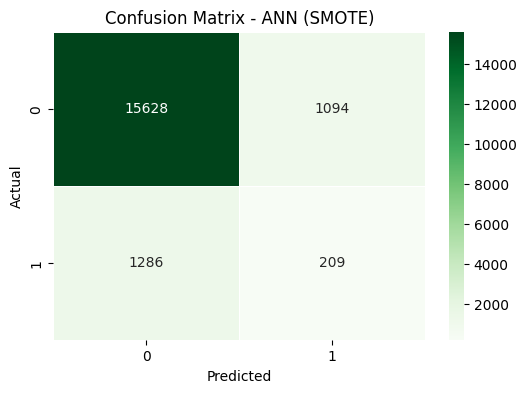

In [ ]:
eval_ann_smote = evaluate_model(ann_smote, X_test, y_test, "ANN SMOTE")
y_pred_ann = ann_smote.predict(X_test)

cm_ann = confusion_matrix(y_test, y_pred_ann)

plt.figure(figsize=(6,4))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Greens', linewidths=.5)
plt.title("Confusion Matrix - ANN (SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Testing

##Pre-processing data test

In [ ]:
df_test = pd.read_csv('application_test.csv')

In [ ]:
miss_angka = joblib.load('imputer_angka.pkl')
miss_kategorik = joblib.load('imputer_kategorikal.pkl')

ohe_test = joblib.load('ohe.pkl')
target_test = joblib.load('target_encoder.pkl')

parameter = joblib.load("capping_params.pkl")

kolom_scaler = joblib.load('kolom_angka_scaling.pkl')
scaler_test = joblib.load('scaler.pkl')

## Missing Values

In [ ]:
# Penanganan Missing Values Numerik
kol_angka = df_test.select_dtypes(include=['int64', 'float64']).columns
df_test[kol_angka] = miss_angka.transform(df_test[kol_angka])

# Penanganan Missing Values Kata / Kategorik
kol_kata = df_test.select_dtypes(include=['object']).columns
df_test[kol_kata] = miss_kategorik.transform(df_test[kol_kata])

In [ ]:
missing_df = df_test.isnull().sum()
missing_df = missing_df[missing_df > 0].reset_index()
missing_df.columns = ['kolom', 'jumlah_missing']
missing_df

,kolom,jumlah_missing


##Encoding

In [ ]:
kolom_ohe_test = [
    "NAME_CONTRACT_TYPE", "HOUSETYPE_MODE", "NAME_TYPE_SUITE",
    "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
    "NAME_HOUSING_TYPE", "WEEKDAY_APPR_PROCESS_START", "FONDKAPREMONT_MODE",
    "WALLSMATERIAL_MODE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY",
    "EMERGENCYSTATE_MODE", "CODE_GENDER"
]
ohe_test_transform = ohe_test.transform(df_test[kolom_ohe_test])

ohe_df_test = pd.DataFrame(ohe_test_transform,
                           columns=ohe_test.get_feature_names_out(kolom_ohe_test),
                           index=df_test.index)

kolom_yang_ada = [col for col in kolom_ohe_test if col in df_test.columns]
df_test = df_test.drop(columns=kolom_yang_ada)
df_test = pd.concat([df_test, ohe_df_test], axis=1)

kolom_target_encd = ['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']
df_test[kolom_target_encd] = target_test.transform(df_test[kolom_target_encd])

In [ ]:
df_test[['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']].head()

,OCCUPATION_TYPE,ORGANIZATION_TYPE
0,0.082309,0.094334
1,0.069075,0.059560
2,0.082309,0.064463
3,0.082309,0.094334
4,0.069075,0.084881


## Outlier

In [ ]:
batas_bawah_test = parameter['batas_bawah']
batas_atas_test = parameter['batas_atas']

df_test['AMT_INCOME_TOTAL'] = df_test['AMT_INCOME_TOTAL'].clip(batas_bawah_test, batas_atas_test)

## Scalling

In [ ]:
for col in kolom_scaler:
    if col not in df_test.columns:
         df_test[col] = 0

X_test_fix = df_test[kolom_scaler].copy()
X_test_scaled = scaler_test.transform(X_test_fix)

df_test[kolom_scaler] = X_test_scaled

## Model Testing/Prediksi

###LR

In [ ]:
pred_test_lr = log_reg_smote.predict(df_test)
print(pred_test_lr)

[1 0 0 ... 1 1 0]


RF

In [ ]:
pred_test_rf = rf_smote.predict(df_test)
print(pred_test_rf)

[1 0 0 ... 0 0 0]


ANN

In [ ]:
pred_test_ann = ann_smote.predict(df_test)
print(pred_test_ann)

[1 0 0 ... 0 0 0]


## Memasukkan kolom target pada data test prediksi

In [ ]:
df_test['TARGET_LR'] = pred_test_lr

/tmp/ipython-input-1645200753.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test['TARGET_LR'] = pred_test_lr


In [ ]:
df_test['TARGET_RF'] = pred_test_rf

/tmp/ipython-input-2006224543.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test['TARGET_RF'] = pred_test_rf


In [ ]:
df_test['TARGET_ANN'] = pred_test_ann

/tmp/ipython-input-4284358852.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test['TARGET_ANN'] = pred_test_ann


##Hasil Prediksi

In [ ]:
df_test[['TARGET_LR', 'TARGET_RF', 'TARGET_ANN']].head(10)

,TARGET_LR,TARGET_RF,TARGET_ANN
0,1,1,1
1,0,0,0
2,0,0,0
3,1,0,0
4,1,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,1,0,0
9,0,0,0


In [ ]:
#df_test.to_csv('prediksi_test_OUTLIERSMOTE.csv', index=False)

## Perbandingan antar model

In [ ]:
df_test[['TARGET_LR', 'TARGET_RF', 'TARGET_ANN']].sum()

,0
TARGET_LR,16000
TARGET_RF,1361
TARGET_ANN,2138


## Visualisasi
Jumlah prediksi kelas 1 dari masing-masing model: LR, RF, dan ANN.

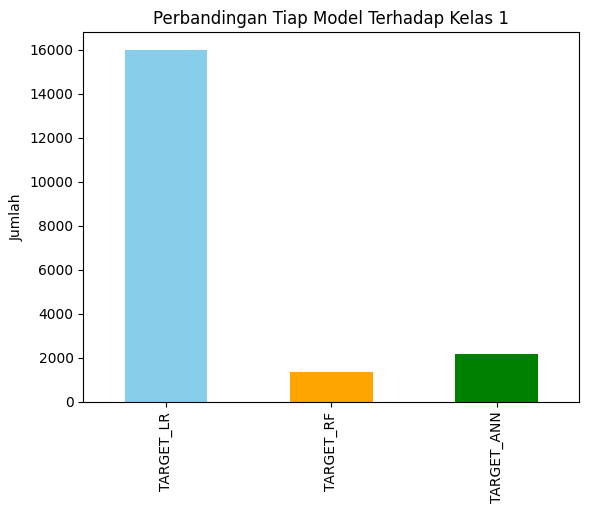

In [ ]:
import matplotlib.pyplot as plt

counts = df_test[['TARGET_LR', 'TARGET_RF', 'TARGET_ANN']].sum()
counts.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Perbandingan Tiap Model Terhadap Kelas 1')
plt.ylabel('Jumlah')
plt.show()